# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [215]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
DATA_FOLDER = 'C:\Users\antho\Documents\GitHub\ADA_EPFL\ADA2018-Homework-master\01 - Pandas and Data Wrangling\data'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-216-2452aca8b283>, line 1)

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [217]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

NameError: name 'DATA_FOLDER' is not defined

In [227]:



Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\sets.csv.zip'
sets = pd.read_csv(Location)

Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\colors.csv.zip'
colors = pd.read_csv(Location)

Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\inventories.csv.zip'
inventories = pd.read_csv(Location)

Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\inventory_parts.csv.zip'
inventory_parts = pd.read_csv(Location)

Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\inventory_sets.csv.zip'
inventory_sets = pd.read_csv(Location)

Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\part_categories.csv.zip'
part_categories = pd.read_csv(Location)

Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\parts.csv.zip'
parts = pd.read_csv(Location)

Location = r'C:\Users\bot_\OneDrive\Documents\GitHub\ADA2018-Homework\01 - Pandas and Data Wrangling\data\lego\themes.csv.zip'
themes = pd.read_csv(Location)

# Write your code here

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [228]:
sets.year

sets.replace(to_replace='70s',value='1970', inplace=True)
sets.replace(to_replace='80s',value='1980',inplace=True)
sets.year = sets.year.astype(int)


unionA = sets.loc[:,"year" ].copy() 
unionA[unionA > 0] = 0
unionA = unionA*(-1)
unionB = sets.loc[:,"year" ].copy()
unionB[unionB < 0] = 0

year = unionB + unionA

u0 = year.copy()
u1 = year.copy()
u0[u0 < 10000] = 0
u1[u1 > 10000] = 0
u0 = u0//10

c_year = u0 + u1 

sets.year = c_year

sets

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
5,0014-1,Space Mini-Figures,1979,143,12
6,0015-1,Space Mini-Figures,1979,143,18
7,0016-1,Castle Mini Figures,1978,186,15
8,00-2,Weetabix Promotional House 1,1976,413,147
9,00-3,Weetabix Promotional House 2,1976,413,149


In [229]:
inventory_parts.quantity.mean() #display -inf
inventory_parts.quantity = inventory_parts.quantity.astype(int) # to integer , -inf is transformed into -2147483648
c_inventory_parts = inventory_parts[inventory_parts.quantity >= 0] #Cleaned inventory parts
c_inventory_parts.quantity

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
10         1
11         4
12         1
13         1
14         1
16         5
17         3
18         1
19         1
20         1
21         1
22         1
23         3
25         1
26         1
27         1
28         1
29         4
30         1
31         1
32         1
          ..
580214     1
580215     1
580216     1
580217     4
580221     4
580224     1
580225     4
580226     8
580227     6
580228    10
580229     6
580231     4
580232     4
580234     8
580235     4
580236     1
580237     1
580238     1
580239     1
580240     1
580241     1
580242     1
580243     1
580244     1
580245     1
580246     3
580247     4
580248     4
580249     9
580250     5
Name: quantity, dtype: int32

Explanation:
sets:year
Some years in the dataset are not possible because the 1st lego was created in 1932.
We can assume that these are typing error, for exemple when the date is -2003, the minus has nothing to do here, it should be 2003.
And when the date is too long like '19955' it should be '1995'.

1- Replace "70s" and "80s" by "1970" and "1980" 
2- Set year type as integer 
3- Make 2 series from the series of year:
        -SerieA :All the negative year -> set all the positive year to 0.
        -SerieB :All the positive year -> set the negative year to 0.

4- Multiply SerieA by -1

5- Add SerieA and SerieB together.

6- Make 2 series from the series of year:
        -SerieA :All the year superior to 10000 -> set all the other year to 0.
        -SerieB :All the year inferior to 10000 -> set all the other year to 0.

7- Divide SerieA by 10 (example: 19955//10 -> 1995)



inventory_parts : quantity
Quantity is supposed to be a natural number, we can't have a 0.5 piece of lego, this would be absurd. But here, quantity's type is float wich is non-sense as we said. 
When there are no information we have -inf.

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

#    A3 . 1    #

In [256]:



cars_part_id = parts.loc[parts['part_cat_id'] == 29].id
cars_inventory_parts = inventory_parts.loc[inventory_parts['part_id'].isin(cars_part_id)].inventory_id

cars_inventory_sets = inventories.loc[inventories['id'].isin(cars_inventory_parts.index)]
cars_inventory_sets
#inventories
#sets.loc[sets['id'].isin(cars_inventory_sets.set_id)]


,id,version
30,51,1
32,54,1
157,227,1
158,228,1
177,255,1
180,259,1
334,483,1
597,865,1
598,866,1
658,954,1



#    A3 . 2    #


In [238]:

Largest_number_part = parts.groupby('part_cat_id').part_cat_id.count().sort_values(ascending=False).head(20)


parts.groupby('part_cat_id').part_cat_id.count()
aligned_part = part_categories.shift(periods=1, freq=None, axis=0)
aligned_part['number'] = (parts.groupby('part_cat_id').part_cat_id.count())
biggest_category = aligned_part.sort_values('number',ascending=False).head(20)

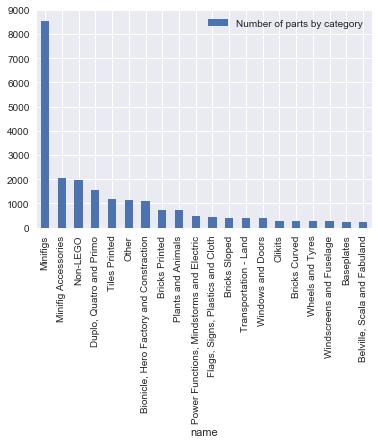

In [239]:
df = pd.DataFrame({"Number of parts by category": Largest_number_part.tolist()}
                 , index=biggest_category.name)
ax = df.plot.bar(rot=90)




#    A3 . 3    #


We are looking for part for the construction of lego car. 
In the part_categories we search for something that is only or mostly on car.
We found the category Wheels and Tyres: id=29.
Then look in the inventory_part for inventory_id with part = 29
In inventory_sets we count the number of set with inventory_id corresponding to 29


## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [185]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [198]:
df = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")
df = df.sort_values('Bike ID')

### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [199]:
#describing types
df.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

In [200]:
#describing attributes
df.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [201]:
cols = df.columns
#fetching numerical columns
num_cols = df._get_numeric_data().columns
#getting categorical columns
Categorical_cols = list(set(cols) - set(num_cols))
#Displaying Categorical attributes
Categorical_cols

['Passholder Type', 'End Time', 'Start Time', 'Trip Route Category']

In [202]:
#Tranforming non-numerical columns to category in order to transform it afterwards
for cols in Categorical_cols:
    df[cols] = df[cols].astype('category')

In [203]:
#transforming categorical values thanks to cat.codes
cat_columns = df.select_dtypes(include=['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
df.head(10)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
129637,1349.0,18660,89072,3000.0,NaN,NaN,1,30.0,95889,3000.0,NaN,NaN,23187120,0
119536,4727.0,1320,81698,3076.0,34.040600,-118.253838,3,0.0,88074,3035.0,34.048401,-118.260948,21199480,0
52820,4727.0,840,34068,3014.0,34.056610,-118.237210,0,365.0,36917,3067.0,34.045181,-118.250240,7877235,0
53083,4727.0,360,34267,3030.0,34.051941,-118.243530,1,30.0,37118,3030.0,34.051941,-118.243530,7957737,1
96424,4727.0,300,64507,3038.0,34.046822,-118.248352,1,30.0,69507,3068.0,34.053200,-118.250954,16589231,0
53116,4727.0,420,34289,3064.0,34.046810,-118.256980,1,30.0,37149,3030.0,34.051941,-118.243530,7962843,0
123733,4727.0,600,84691,3064.0,34.046810,-118.256981,1,30.0,91337,3042.0,34.049301,-118.238808,22006340,0
20632,4727.0,1320,13812,3077.0,34.039871,-118.250040,1,30.0,14609,3035.0,34.048401,-118.260950,5043408,0
53122,4727.0,420,34292,3030.0,34.051941,-118.243530,3,0.0,37155,3064.0,34.046810,-118.256980,7962830,0
96582,4727.0,420,64629,3033.0,34.040989,-118.255798,1,30.0,69635,3038.0,34.046822,-118.248352,16643807,0


In [204]:
#Extracting redundant columns based on the analysis explained in Output[209]
Redudant_columns = ['Duration','Plan Duration','Ending Station Latitude','Ending Station Longitude','Starting Station Latitude','Starting Station Latitude']
df_redundancy = df[Redudant_columns]
df_redundancy.head(20)

,Duration,Plan Duration,Ending Station Latitude,Ending Station Longitude,Starting Station Latitude,Starting Station Latitude
129637,18660,30.0,NaN,NaN,NaN,NaN
119536,1320,0.0,34.040600,-118.253838,34.048401,34.048401
52820,840,365.0,34.056610,-118.237210,34.045181,34.045181
53083,360,30.0,34.051941,-118.243530,34.051941,34.051941
96424,300,30.0,34.046822,-118.248352,34.053200,34.053200
53116,420,30.0,34.046810,-118.256980,34.051941,34.051941
123733,600,30.0,34.046810,-118.256981,34.049301,34.049301
20632,1320,30.0,34.039871,-118.250040,34.048401,34.048401
53122,420,0.0,34.051941,-118.243530,34.046810,34.046810
96582,420,30.0,34.040989,-118.255798,34.046822,34.046822


In [211]:
#Create dataframe without redundancy
df_withoutRedundancy = df
df_withoutRedundancy.drop(df_withoutRedundancy.columns[[1, 2]], axis=1, inplace=True)
df_withoutRedundancy.head(20)

,Bike ID,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
129637,1349.0,NaN,1,30.0,95889,3000.0,NaN,NaN,23187120,0
119536,4727.0,-118.253838,3,0.0,88074,3035.0,34.048401,-118.260948,21199480,0
52820,4727.0,-118.237210,0,365.0,36917,3067.0,34.045181,-118.250240,7877235,0
53083,4727.0,-118.243530,1,30.0,37118,3030.0,34.051941,-118.243530,7957737,1
96424,4727.0,-118.248352,1,30.0,69507,3068.0,34.053200,-118.250954,16589231,0
53116,4727.0,-118.256980,1,30.0,37149,3030.0,34.051941,-118.243530,7962843,0
123733,4727.0,-118.256981,1,30.0,91337,3042.0,34.049301,-118.238808,22006340,0
20632,4727.0,-118.250040,1,30.0,14609,3035.0,34.048401,-118.260950,5043408,0
53122,4727.0,-118.243530,3,0.0,37155,3064.0,34.046810,-118.256980,7962830,0
96582,4727.0,-118.255798,1,30.0,69635,3038.0,34.046822,-118.248352,16643807,0


In [206]:
#Displaying dataframe redundancy types
df_redundancy.dtypes

Duration                       int64
Plan Duration                float64
Ending Station Latitude      float64
Ending Station Longitude     float64
Starting Station Latitude    float64
Starting Station Latitude    float64
dtype: object

In [207]:
#Displaying dataframe redundancy shape
df_redundancy.shape

(132427, 6)

In [208]:
#Displaying dataframe redundancy types
df_withoutRedundancy.dtypes

Bike ID                       float64
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                  int8
Plan Duration                 float64
Start Time                      int32
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category              int8
dtype: object

In [209]:
#Displaying dataframe redundancy shape
df_withoutRedundancy.shape

(132427, 12)

<u><b>Redundant columns:</b></u><br>
1 - Duration column is the total second between start time and end time<br>
2 - Plan duration is the number of days in the plan, it depends of the PassHolder Type
Monthly -> 30, Flex Pass -> 365<br>
3 - Ending and Starting station Longitude Latitude only depends of the Ending and Starting station ID
There would be a table that reference the station with Station ID and their latitude / longitude<br>

<u><b>Redundant columns pitfalls:</b></u><br>
Having redundant columns is a poor design, instead of doing that we should have other tables that reference primary and foreign keys. Thanks to a such design, we have only one table to update when there is a change. For instance, if a station moves to another localisation we will update its longitude/latitude in the Station table, but it won't be updated in this table.

### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [210]:
# Write your code here

__\* Briefly explain your approach for every query here \*__